In [ ]:
'''

Final 100% Code

'''

In [6]:
# imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import plotly.express as px
import warnings
import csv
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('all')

In [8]:
df = pd.read_csv('/content/modified_dataset.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity  seats  selling_price  age  \
0           26        19        3916      5          46135   13   
1           28        19        3916      5          40650   13   
2           28        20        3916      5          36350   13   
3           28        18        3916      5          29450   13   
4           28        18        3916      5          34500   13   

         car_name  km_driven  
0  BMW 1 Series M      62058  
1    BMW 1 Series      22345  
2    BMW 1 Series      36402  
3    BMW 1 Series      80163  
4    BMW 1 Series      40460

In [10]:
# Numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'seats', 'selling_price', 'age', 'km_driven']

We have 9 categorical features : ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'car_name']


In [20]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  seats              11914 non-null  int64  
 16  selling_price      119

(11914, 20)

In [21]:
#Missing Values
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Total    Percent
Market Category     3742  31.408427
Engine HP             69   0.579151
Engine Cylinders      30   0.251805
Number of Doors        6   0.050361
Engine Fuel Type       3   0.025180
Make                   0   0.000000
city mpg               0   0.000000
car_name               0   0.000000
age                    0   0.000000
selling_price          0   0.000000
seats                  0   0.000000
Popularity             0   0.000000
Vehicle Size           0   0.000000
highway MPG            0   0.000000
Vehicle Style          0   0.000000
Model                  0   0.000000
Driven_Wheels          0   0.000000
Transmission Type      0   0.000000
Year                   0   0.000000
km_driven              0   0.000000

In [22]:
data=df

# Fill missing values for Market Category with the mode
data['Market Category'].fillna(data['Market Category'].mode()[0], inplace=True)

# Fill missing values for Engine HP, Engine Cylinders, and Number of Doors with the median
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace=True)
data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace=True)

# Fill missing values for Engine Fuel Type with the mode
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)

# Verify if there are any missing values left
print(data.isnull().sum())

# Write the updated data to a new CSV file if needed
data.to_csv("updated_dataset.csv", index=False)  # replace "updated_dataset.csv" with your desired file name


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
seats                0
selling_price        0
age                  0
car_name             0
km_driven            0
dtype: int64


In [23]:
df.duplicated().value_counts()

False    11914
Name: count, dtype: int64

In [18]:
df = df.drop_duplicates()
df.dropna()

Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             Market Category Vehicle Size  Vehicle Style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway MPG  city mpg  Popularity  seats  selling_price  age  \
0               26        19        3916      5          46135   13   
1               28        19        3916      5          40650   13   
2               28        20        3916      5          36350   13   
3               28        18        3916      5          29450   13   
4               28        18        3916      5          34500   13   
...            ...       ...         ...    ...            ...  ...   
11909           23        16         204      5          46120   12   
11910           23        16         204      5          56670   12   
11911           23        16         204      5          50620   12   
11912           23        16         204      5          50920   11   
11913           26        17          61      5          28995   18   

             car_name  km_driven  
0      BMW 1 Series M      62058  
1        BMW 1 Series      22345  
2        BMW 1 Series      36402  
3        BMW 1 Series      80163  
4        BMW 1 Series      40460  
...               ...        ...  
11909       Acura ZDX      84683  
11910       Acura ZDX      70636  
11911  

In [19]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'seats', 'selling_price',
       'age', 'car_name', 'km_driven'],
      dtype='object')

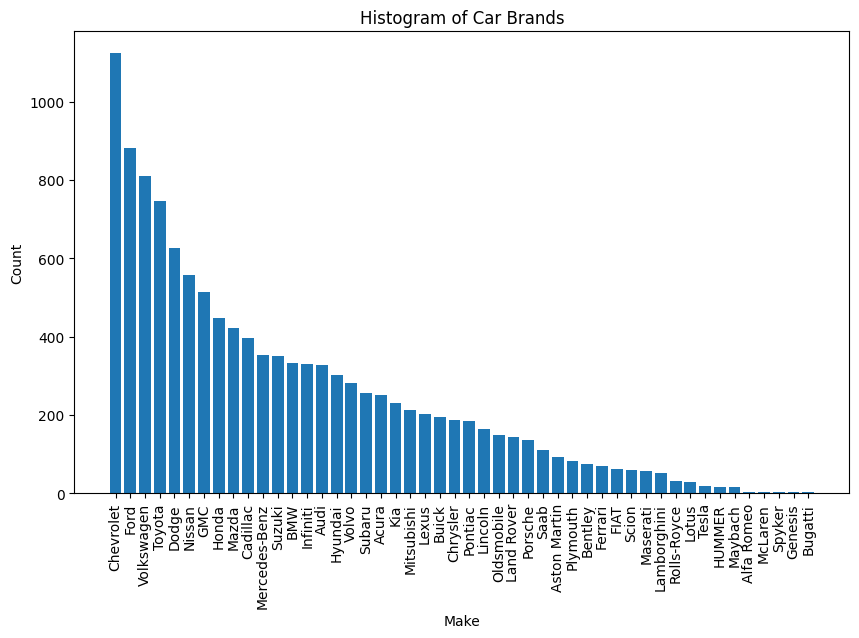

In [21]:
# Assuming 'df' is your DataFrame containing the dataset
brand_counts = df['Make'].value_counts()

# Increase the size of the plot
plt.figure(figsize=(10, 6))  # Adjust the width and height as per your preference

# Plotting the histogram
plt.bar(brand_counts.index, brand_counts.values)

# Adding labels and title
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Histogram of Car Brands')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'car_name']

# Create a dictionary to store the label encoder objects
label_encoders = {}

# Loop through the categorical columns and fit label encoder to each column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # Store the label encoder object in the dictionary
    label_encoders[col] = le

df.head()


Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0     4      1  2011                 8      335.0               6.0   
1     4      0  2011                 8      300.0               6.0   
2     4      0  2011                 8      300.0               6.0   
3     4      0  2011                 8      230.0               6.0   
4     4      0  2011                 8      230.0               6.0   

   Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                  3              3              2.0               38   
1                  3              3              2.0               67   
2                  3              3              2.0               64   
3                  3              3              2.0               67   
4                  3              3              2.0               63   

   Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  seats  \
0             0              8           26        19        3916      5   
1             0              6           28        19        3916      5   
2             0              8           28        20        3916      5   
3             0              8           28        18        3916      5   
4             0              6           28        18        3916      5   

   selling_price  age  car_name  km_driven  
0          46135   13        66      62058  
1          40650   13        65      22345  
2          36350   13        65      36402  
3          29450   13        65      80163  
4          34500   13        65      40460

In [30]:
df.describe()

Make         Model          Year  Engine Fuel Type  \
count  11914.000000  11914.000000  11914.000000      11914.000000   
mean      23.227463    460.240054   2010.384338          7.992782   
std       14.545781    269.435859      7.579740          1.798163   
min        0.000000      0.000000   1990.000000          0.000000   
25%       10.000000    219.000000   2007.000000          8.000000   
50%       20.000000    457.000000   2015.000000          9.000000   
75%       36.000000    711.000000   2016.000000          9.000000   
max       47.000000    914.000000   2017.000000          9.000000   

          Engine HP  Engine Cylinders  Transmission Type  Driven_Wheels  \
count  11914.000000      11914.000000       11914.000000   11914.000000   
mean     249.256421          5.629763           1.450646       1.770186   
std      108.888444          1.778413           0.924656       1.066762   
min       55.000000          0.000000           0.000000       0.000000   
25%      170.000000          4.000000           1.000000       1.000000   
50%      227.000000          6.000000           1.000000       2.000000   
75%      300.000000          6.000000           2.000000       3.000000   
max     1001.000000         16.000000           4.000000       3.000000   

       Number of Doors  Market Category  Vehicle Size  Vehicle Style  \
count     11914.000000     11914.000000  11914.000000   11914.000000   
mean          3.436377        28.607437      0.967181       8.355212   
std           0.881184        27.438468      0.875157       4.915271   
min           2.000000         0.000000      0.000000       0.000000   
25%           2.000000         0.000000      0.000000       3.000000   
50%           4.000000        26.000000      1.000000       8.000000   
75%           4.000000        60.000000      2.000000      14.000000   
max           4.000000        70.000000      2.000000      15.000000   

        highway MPG      city mpg    Popularity    seats  selling_price  \
count  11914.000000  11914.000000  11914.000000  11914.0   1.191400e+04   
mean      26.637485     19.733255   1554.911197      5.0   4.059474e+04   
std        8.863001      8.987798   1441.855347      0.0   6.010910e+04   
min       12.000000      7.000000      2.000000      5.0   2.000000e+03   
25%       22.000000     16.000000    549.000000      5.0   2.100000e+04   
50%       26.000000     18.000000   1385.000000      5.0   2.999500e+04   
75%       30.000000     22.000000   2009.000000      5.0   4.223125e+04   
max      354.000000    137.000000   5657.000000      5.0   2.065902e+06   

                age      car_name     km_driven  
count  11914.000000  11914.000000  11914.000000  
mean      13.615662    482.165603  52611.025516  
std        7.579740    273.917802  18896.716062  
min        7.000000      0.000000  20005.000000  
25%        8.000000    253.000000  36270.750000  
50%        9.000000    437.000000  52663.000000  
75%       17.000000    741.000000  69055.500000  
max       34.000000    927.000000  84997.000000

In [31]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int64  
 1   Model              11914 non-null  int64  
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  int64  
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  int64  
 7   Driven_Wheels      11914 non-null  int64  
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  int64  
 10  Vehicle Size       11914 non-null  int64  
 11  Vehicle Style      11914 non-null  int64  
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  seats              11914 non-null  int64  
 16  selling_price      119

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0         4      1  2011                 8      335.0               6.0   
1         4      0  2011                 8      300.0               6.0   
2         4      0  2011                 8      300.0               6.0   
3         4      0  2011                 8      230.0               6.0   
4         4      0  2011                 8      230.0               6.0   
...     ...    ...   ...               ...        ...               ...   
11909     0    901  2012                 8      300.0               6.0   
11910     0    901  2012                 8      300.0               6.0   
11911     0    901  2012                 8      300.0               6.0   
11912     0    901  2013                 7      300.0               6.0   
11913    25    902  2006                 9      221.0               6.0   

       Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                      3              3              2.0               38   
1                      3              3              2.0               67   
2                      3              3              2.0               64   
3                      3              3              2.0               67   
4                      3              3              2.0               63   
...                  ...            ...              ...              ...   
11909                  1              0              4.0               13   
11910                  1              0              4.0               13   
11911                  1              0              4.0               13   
11912                  1              0              4.0               13   
11913                  1              2              4.0               63   

       Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  seats  \
0                 0              8           26        19        3916      5   
1                 0              6           28        19        3916      5   
2                 0              8           28        20        3916      5   
3                 0              8           28        18        3916      5   
4                 0              6           28        18        3916      5   
...             ...            ...          ...       ...         ...    ...   
11909             2              2           23        16         204      5   
11910             2              2           23        16         204      5   
11911             2              2           23        16         204      5   
11912             2              2           23        16         204      5   
11913             2             14           26        17          61      5   

       selling_price  age  car_name  km_driven  
0              46135   13        66      62058  
1              40650   13        65      22345  
2              36350   13        65      36402  
3              29450   13        65      80163  
4              34500   13        65      40460  
...              ...  ...       ...        ...  
11909          46120   12        17      84683  
11910          56670   12        17      70636  
11911          50620   12        17      49235  
11912          50920   11        17      79585  
11913          28995   18       566      47159  

[11914 rows x 20 columns]

In [32]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

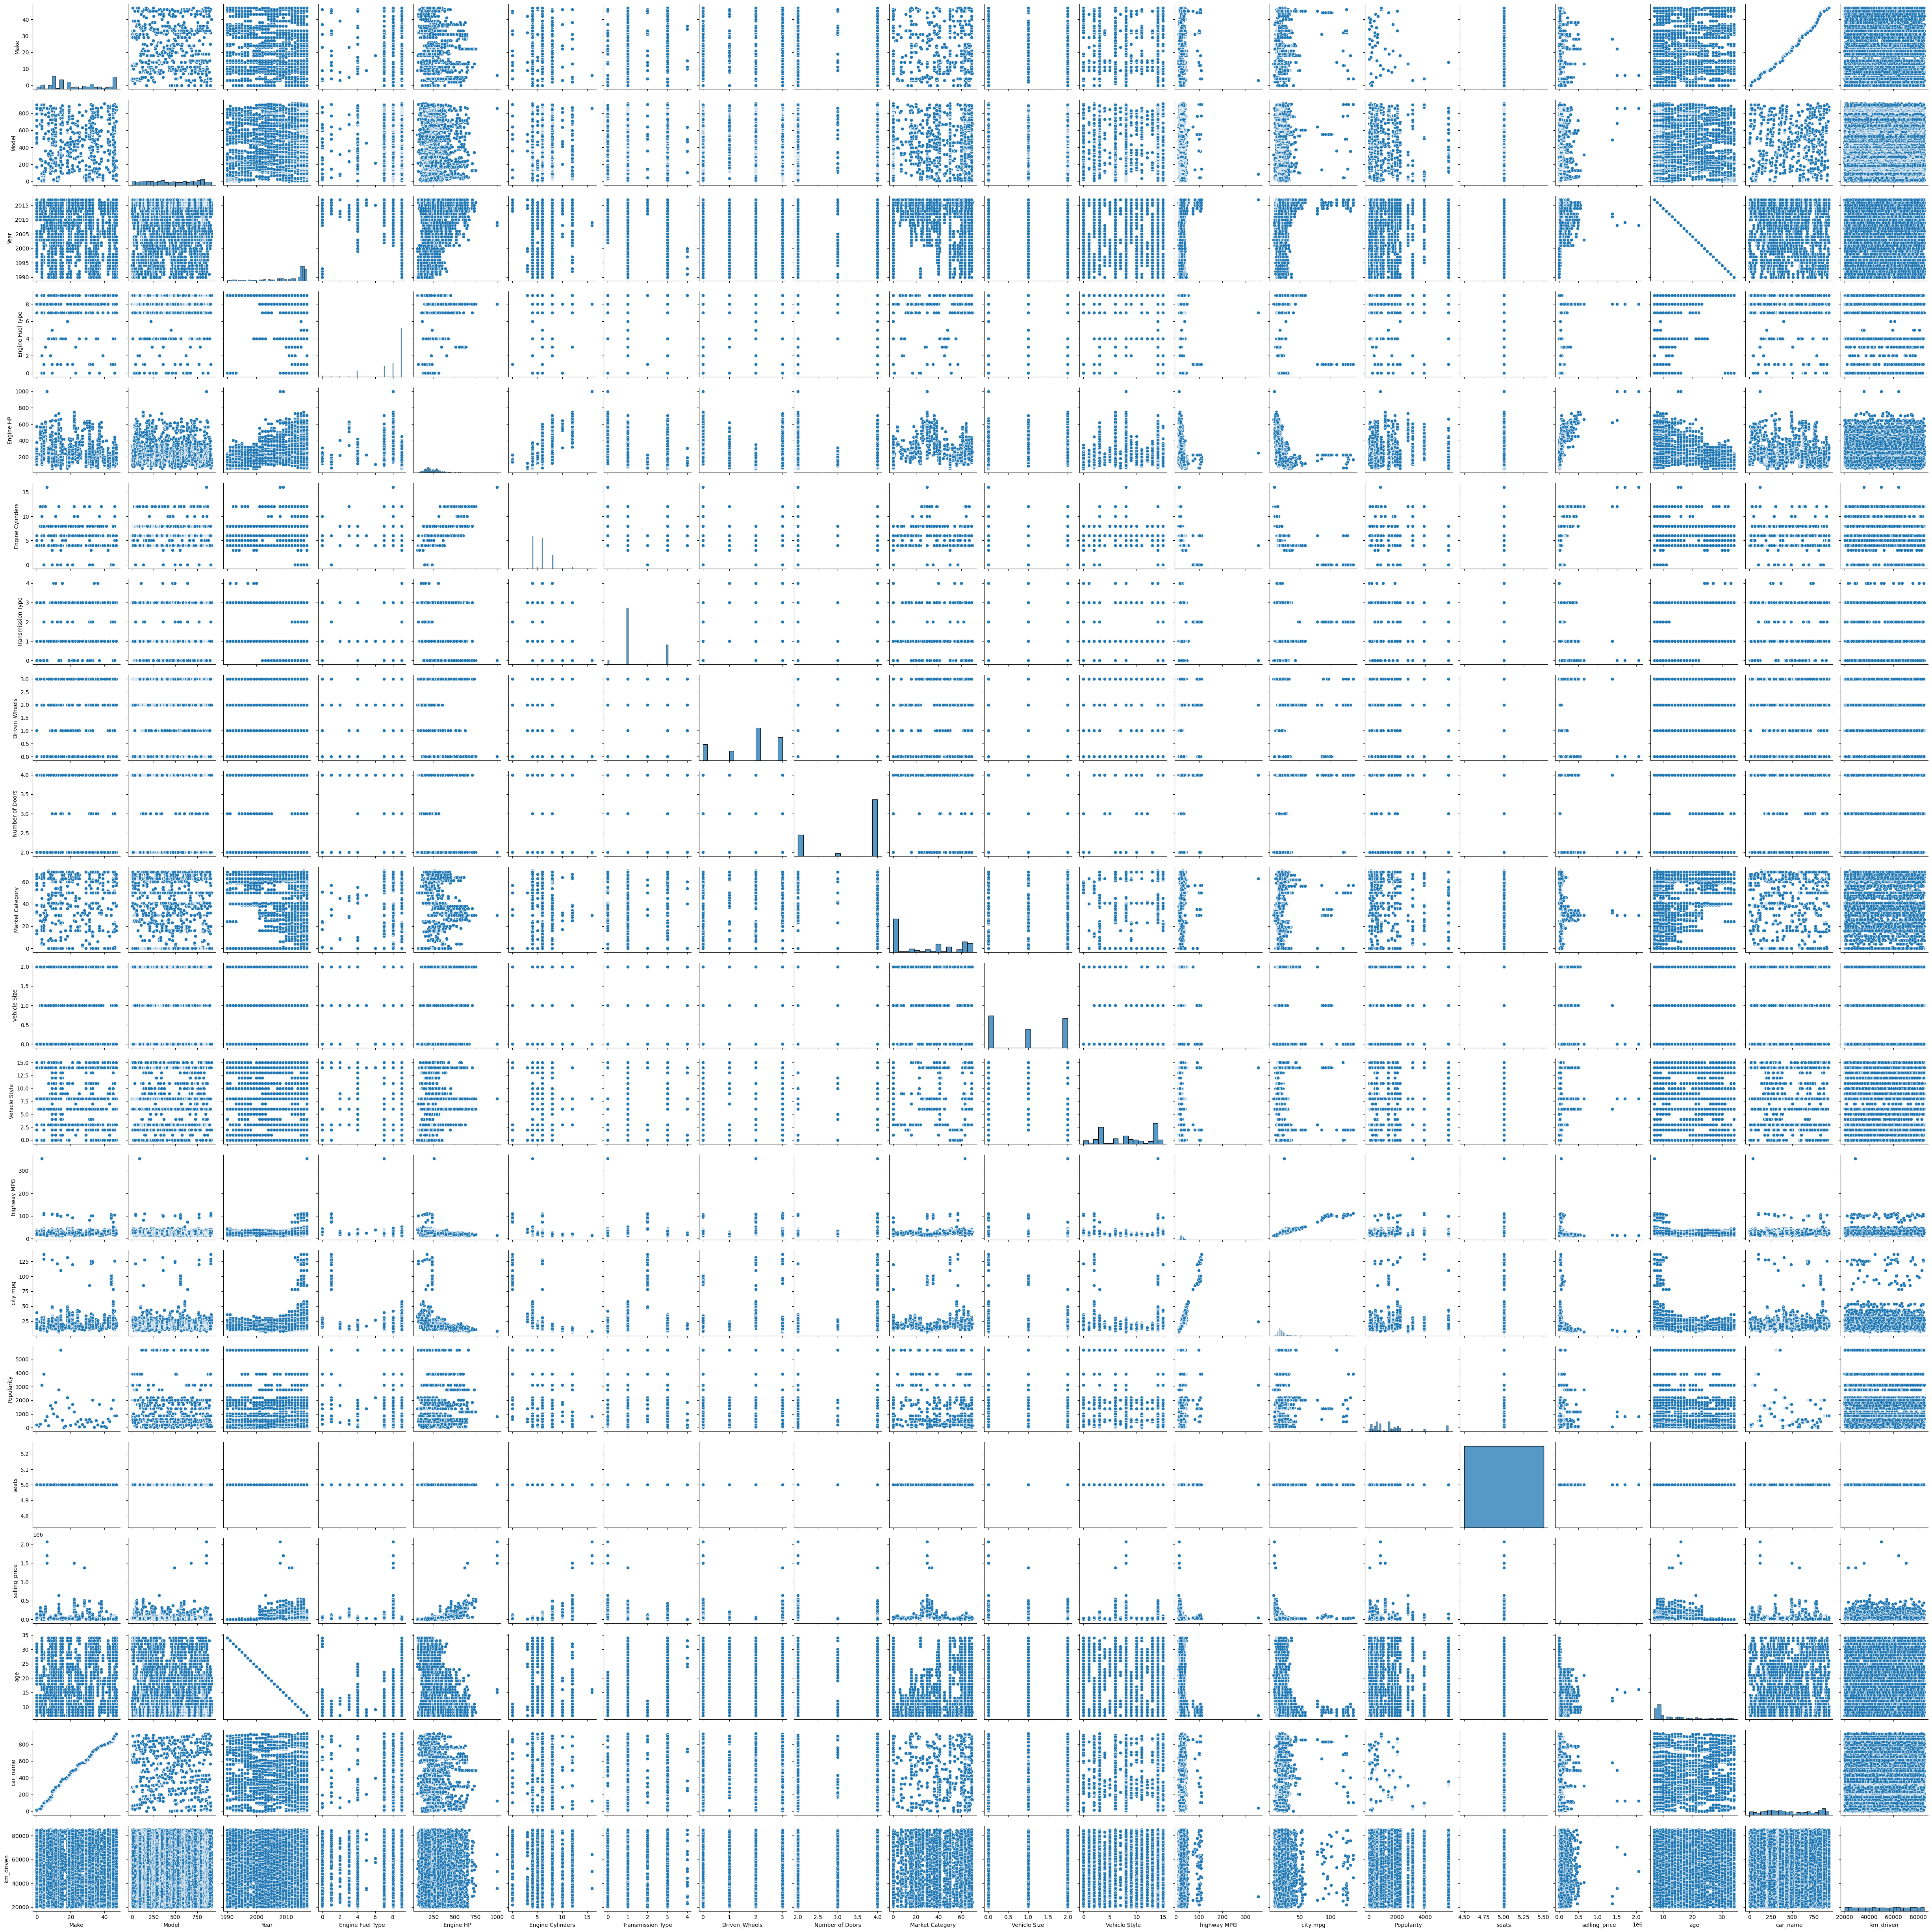

In [33]:
sns.pairplot(df)

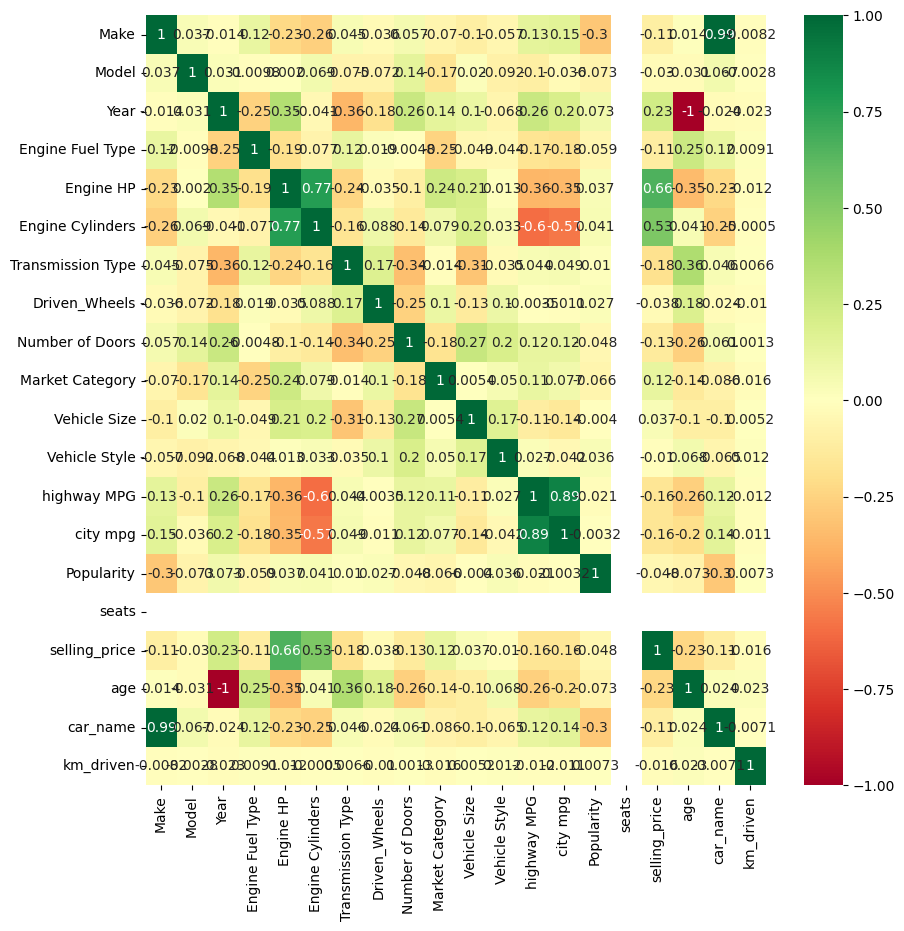

In [34]:
corrmat = df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
from sklearn.model_selection import train_test_split
X=df
y= df['car_name']

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

In [ ]:
# Models Evaluation
from sklearn import tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_regressor = lr_model.fit(X_train, y_train)
lr_pred = lr_regressor.predict(X_test)
evs_lr = explained_variance_score(y_true=y_test, y_pred=lr_pred)
r_square_score_lr = r2_score(y_true=y_test, y_pred=lr_pred)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_regressor = dt_model.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)
evs_dt = explained_variance_score(y_true=y_test, y_pred=dt_pred)
r_square_score_dt = r2_score(y_true=y_test, y_pred=dt_pred)

# Random Forest
rf_model = ensemble.RandomForestRegressor()
rf_regressor = rf_model.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
evs_rf = explained_variance_score(y_true=y_test, y_pred=rf_pred)
r_square_score_rf = r2_score(y_true=y_test, y_pred=rf_pred)

# Gradient Boosting
gb_model = ensemble.GradientBoostingRegressor()
gb_regressor = gb_model.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
evs_gb = explained_variance_score(y_true=y_test, y_pred=gb_pred)
r_square_score_gb = r2_score(y_true=y_test, y_pred=gb_pred)

# Create a DataFrame to store the results
ML_df = pd.DataFrame({
    "Model": ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    "Explained Variance Score": [evs_lr, evs_dt, evs_rf, evs_gb],
    "R-Square Score(Accuracy)": [r_square_score_lr, r_square_score_dt, r_square_score_rf, r_square_score_gb],
})

# Set the index to "Model"
ML_df.set_index('Model', inplace=True)

# Print the results in markdown format
print(ML_df.to_markdown())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_lr = mean_squared_error(y_true=y_test, y_pred=pred)
rmse_lr = np.sqrt(mse_lr)
ML_df = pd.DataFrame({
    "Model": ['Linear Regression'],
    "Mean Squared Error": [mse_lr],
    "Root Mean Squared Error": [rmse_lr],
})

ML_df.set_index('Model', inplace=True)
print(ML_df.to_markdown())

In [37]:
d2=df['car_name'].value_counts().size
print("Total Car names : ",d2)


Total Car names :  928


In [27]:
X = df.drop(['car_name'], axis=1).values
y = df['car_name'].values

In [28]:
#ANN training
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with early stopping
h1=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
149/149 [==============================] - 3s 11ms/step - loss: 6.4964 - accuracy: 0.0125 - val_loss: 6.1176 - val_accuracy: 0.0235
Epoch 2/100
149/149 [==============================] - 1s 6ms/step - loss: 5.6394 - accuracy: 0.0503 - val_loss: 5.1589 - val_accuracy: 0.0982
Epoch 3/100
149/149 [==============================] - 1s 6ms/step - loss: 4.6386 - accuracy: 0.1212 - val_loss: 4.1097 - val_accuracy: 0.2266
Epoch 4/100
149/149 [==============================] - 1s 6ms/step - loss: 3.7320 - accuracy: 0.2144 - val_loss: 3.2433 - val_accuracy: 0.3613
Epoch 5/100
149/149 [==============================] - 1s 6ms/step - loss: 3.0943 - accuracy: 0.2821 - val_loss: 2.6621 - val_accuracy: 0.4184
Epoch 6/100
149/149 [==============================] - 1s 9ms/step - loss: 2.6606 - accuracy: 0.3384 - val_loss: 2.2794 - val_accuracy: 0.5141
Epoch 7/100
149/149 [==============================] - 2s 11ms/step - loss: 2.3786 - accuracy: 0.3818 - val_loss: 2.0089 - val_accuracy: 0.55

In [29]:
# Evaluate the model ANN
scores = model.evaluate(X_test, y_test)
print("Accuracy of ANN: ")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

75/75 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.8829
Accuracy of ANN: 
accuracy: 88.29%


In [30]:
# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)
print("Model Loss: {:.4f}".format(loss))
print("MSE: {:.2f}".format(mse))

75/75 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.8829
Model Loss: 0.7150
MSE: 0.88


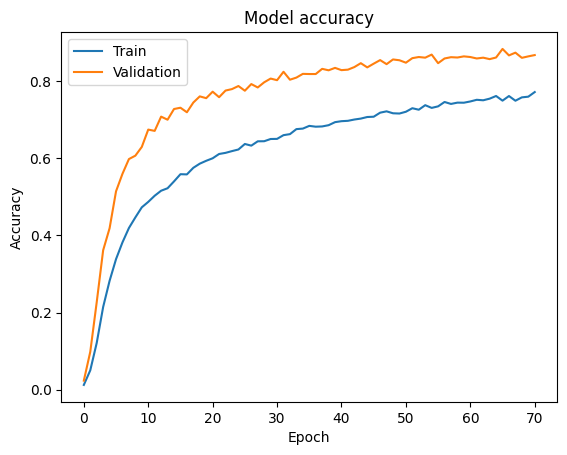

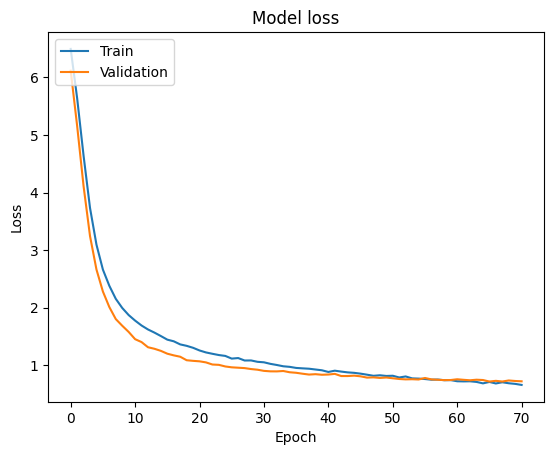

In [31]:
import matplotlib.pyplot as plt

# Train the model with early stopping
history = h1

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [32]:
# RNN training
from tensorflow.keras.layers import LSTM

# Define the model architecture
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu'))  # LSTM layer with 128 units
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Reshape input data for LSTM
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape input to be [samples, time steps, features]
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with early stopping
h2=model_rnn.fit(X_train_rnn, y_train, epochs=100, batch_size=64, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping])


Epoch 1/100
149/149 [==============================] - 18s 102ms/step - loss: 6.5902 - accuracy: 0.0097 - val_loss: 6.4821 - val_accuracy: 0.0092
Epoch 2/100
149/149 [==============================] - 11s 72ms/step - loss: 6.3901 - accuracy: 0.0124 - val_loss: 6.4364 - val_accuracy: 0.0092
Epoch 3/100
149/149 [==============================] - 8s 51ms/step - loss: 6.3549 - accuracy: 0.0151 - val_loss: 6.3267 - val_accuracy: 0.0239
Epoch 4/100
149/149 [==============================] - 6s 42ms/step - loss: 6.0574 - accuracy: 0.0233 - val_loss: 5.9382 - val_accuracy: 0.0315
Epoch 5/100
149/149 [==============================] - 7s 49ms/step - loss: 5.6241 - accuracy: 0.0321 - val_loss: 5.6104 - val_accuracy: 0.0390
Epoch 6/100
149/149 [==============================] - 6s 41ms/step - loss: 5.3110 - accuracy: 0.0381 - val_loss: 5.3875 - val_accuracy: 0.0378
Epoch 7/100
149/149 [==============================] - 7s 47ms/step - loss: 5.0847 - accuracy: 0.0443 - val_loss: 5.2465 - val_accura

In [33]:
# Evaluate the model RNN
scores = model_rnn.evaluate(X_test_rnn, y_test)
print("\nAccuracy of RNN:")
print("%s: %.2f%%" % (model_rnn.metrics_names[1], scores[1]*100))

75/75 [==============================] - 1s 10ms/step - loss: 2.3587 - accuracy: 0.4499

Accuracy of RNN:
accuracy: 44.99%


In [34]:
# Evaluate the model RNN
loss = model.evaluate(X_test, y_test)[0]
mse = model.evaluate(X_test, y_test)[1]
print("RNN Model Loss: {:.4f}".format(loss))
print("MSE: {:.2f}".format(mse))

75/75 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.8829
RNN Model Loss: 0.7150
MSE: 0.88


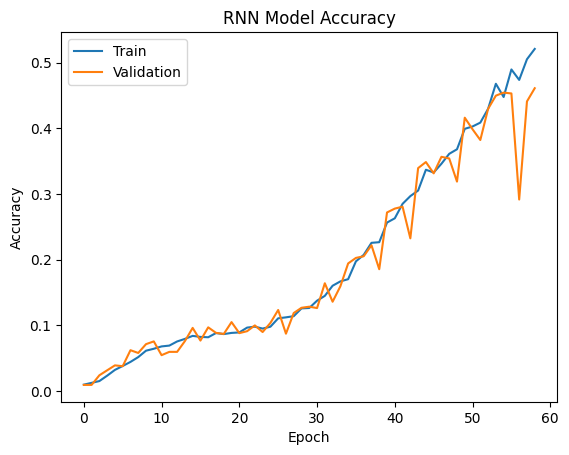

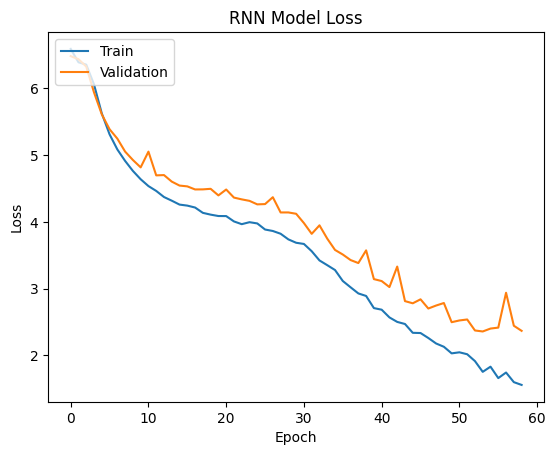

In [35]:
import matplotlib.pyplot as plt

# Train the model with early stopping
history_rnn = h2

# Plot training & validation accuracy values
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [53]:
df.head(2)

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0     4      1  2011                 8      335.0               6.0   
1     4      0  2011                 8      300.0               6.0   

   Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                  3              3              2.0               38   
1                  3              3              2.0               67   

   Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity  seats  \
0             0              8           26        19        3916      5   
1             0              6           28        19        3916      5   

   selling_price  age  car_name  km_driven  
0          46135   13        66      62058  
1          40650   13        65      22345

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Define the provided X_new data
X_new = np.array([
    [4,1, 2011, 8, 335.0, 6.0, 3, 3, 2.0, 38, 0, 8, 26, 19, 3916, 5, 46135, 13, 62058],  # Sample 1
    # Add more samples if needed
])

# Load or define and fit the scaler
scaler = MinMaxScaler()
scaler.fit(X)  # Assuming X is your training data

# Scale the new data
X_new_scaled = scaler.transform(X_new)
predictions_probabilities = model.predict(X_new_scaled)
predicted_classes1 = predictions_probabilities.argmax(axis=-1)

############################################################################
# cosine similarity
cos_similarities = cosine_similarity(X_new,X)
most_similar_index = np.argmax(cos_similarities, axis=1)
predicted_classes2 = df.iloc[most_similar_index]['car_name'].values

############################################################################
# RNN
X_new_scaled = scaler.transform(X_new)
X_new_rnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))
predictions = model_rnn.predict(X_new_rnn)
predicted_classes3 = np.argmax(predictions, axis=1)
#############################################################################




##############################################################################
print("Car prediction by ANN")
predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes1)
print(predicted_car_names)
#############################################################################
print("\n\nCar prediction by Cosine Similarity")
predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes2)
print(predicted_car_names)

#############################################################################
print("\n\nCar prediction by RNN")
predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes3)
print(predicted_car_names)

#############################################################################




1/1 [==============================] - 0s 256ms/step
Car prediction by ANN
['BMW 1 Series']


Car prediction by Cosine Similarity
['BMW 1 Series M']


Car prediction by RNN
['Chevrolet C/K 1500 Series']


In [ ]:
def ann(arr):
   X_new_scaled = scaler.transform(arr)
   predictions_probabilities = model.predict(X_new_scaled)
   predicted_classes1 = predictions_probabilities.argmax(axis=-1)
   print("Car prediction by ANN")
   predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes1)
   print(predicted_car_names)
########################################################################################
def rnn(arr):
   X_new_scaled = scaler.transform(arr)
   X_new_rnn = X_new_scaled.reshape((X_new_scaled.shape[0], X_new_scaled.shape[1], 1))
   predictions = model_rnn.predict(X_new_rnn)
   predicted_classes3 = np.argmax(predictions, axis=1)
   print("\n\nCar prediction by RNN")
   predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes3)
   print(predicted_car_names)
##########################################################################################

def cosine(arr):
    cos_similarities = cosine_similarity(arr,X)
    most_similar_index = np.argmax(cos_similarities, axis=1)
    predicted_classes2 = df.iloc[most_similar_index]['car_name'].values
    print("\n\nCar prediction by Cosine Similarity")
    predicted_car_names = label_encoders['car_name'].inverse_transform(predicted_classes2)
    print(predicted_car_names)


In [ ]:
# User Interface Defaults
default_brand = df['brand'].mode()[0]  # Most frequent brand
default_model = df['model'].mode()[0]  # Most frequent model
default_vehicle_age = int(df['vehicle_age'].mean())  # Average vehicle age
default_fuel_type = df['fuel_type'].mode()[0]  # Most frequent fuel type
default_seats = 5  # Default number of seats
default_km_driven = int(df['km_driven'].mean())  # Average km driven
default_transmission_type = 'Manual'  # Default transmission type
default_mileage = df['mileage'].mean()  # Average mileage
default_engine_size = df['engine'].mode()[0]  # Most frequent engine size
default_max_power = df['max_power'].mean()  # Average max power
default_price = int(df['selling_price'].mean())  # Average selling price

# Print unique brands
total_brands = df['brand'].unique()
brand = label_encoders['brand'].inverse_transform(total_brands)

fuel_type = df['fuel_type'].unique()
fuel_type1 = label_encoders['fuel_type'].inverse_transform(fuel_type)

transmission = df['transmission_type'].unique()
transmission1 = label_encoders['transmission_type'].inverse_transform(transmission)

# Ask for user inputs
for i, b in enumerate(brand):
    print(f"{i}: {b}")
brand_input = input("Enter the number corresponding to the brand (or press Enter for default): ").strip()
default_brand = total_brands[int(brand_input)] if brand_input else default_brand

# Ask for user input for fuel type
print("Please select the fuel type of the car (or press Enter for default):")
for i, ft in enumerate(fuel_type1):
    print(f"{i}: {ft}")
fuel_input = input("Enter the number corresponding to the fuel type: ").strip()
default_fuel_type = fuel_type[int(fuel_input)] if fuel_input else default_fuel_type

# Ask for user input for transmission type
print("Please select the transmission type of the car (or press Enter for default):")
for i, t in enumerate(transmission1):
    print(f"{i}: {t}")
transmission_input = input("Enter the number corresponding to the transmission type: ").strip()
default_transmission_type = transmission[int(transmission_input)] if transmission_input else default_transmission_type


# Ask for user input for vehicle age
vehicle_age_input = input("Enter your vehicle age requirement (or press Enter for default): ").strip()
default_vehicle_age = int(vehicle_age_input) if vehicle_age_input else default_vehicle_age

# Ask for user input for maximum km driven
km_driven_input = input("Enter maximum km driven by your vehicle (or press Enter for default): ").strip()
default_km_driven = int(km_driven_input) if km_driven_input else default_km_driven

# Ask for user input for maximum mileage capacity
mileage_input = input("Enter maximum mileage capacity for your vehicle (or press Enter for default): ").strip()
default_mileage = mileage_input if mileage_input else default_mileage

# Ask for user input for engine size
engine_size_input = input("Enter engine size for your vehicle (or press Enter for default): ").strip()
default_engine_size = engine_size_input if engine_size_input else default_engine_size

# Ask for user input for max power
max_power_input = input("Enter max power for your vehicle (or press Enter for default): ").strip()
default_max_power = max_power_input if max_power_input else default_max_power

default_price=input("enter your max price range for your vehicle : ")



user_inputs = [
    default_brand,
    default_model,
    default_vehicle_age,
    default_fuel_type,
    default_seats,
    default_km_driven,
    default_transmission_type,
    default_mileage,
    default_engine_size,
    default_max_power,
    default_price
]

# Convert all the inputs to the appropriate data types before sending them to the model
user_inputs = [
    str(user_inputs[0]),  # Brand (convert to string)
    str(user_inputs[1]),  # Model (convert to string)
    int(user_inputs[2]),  # Vehicle Age (convert to integer)
    str(user_inputs[3]),  # Fuel Type (convert to string)
    int(user_inputs[4]),  # Seats (convert to integer)
    int(user_inputs[5]),  # KM Driven (convert to integer)
    str(user_inputs[6]),  # Transmission Type (convert to string)
    float(user_inputs[7]),  # Mileage (convert to float)
    int(user_inputs[8]),  # Engine Size (convert to integer)
    float(user_inputs[9]),  # Max Power (convert to float)
    int(user_inputs[10])  # Price (convert to integer)
]
user_inputs1 = [user_inputs]
ann(user_inputs1)
rnn(user_inputs1)
cosine(user_inputs1)